<a href="https://colab.research.google.com/github/vvrgit/ML-Optimization/blob/main/RMSprop_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

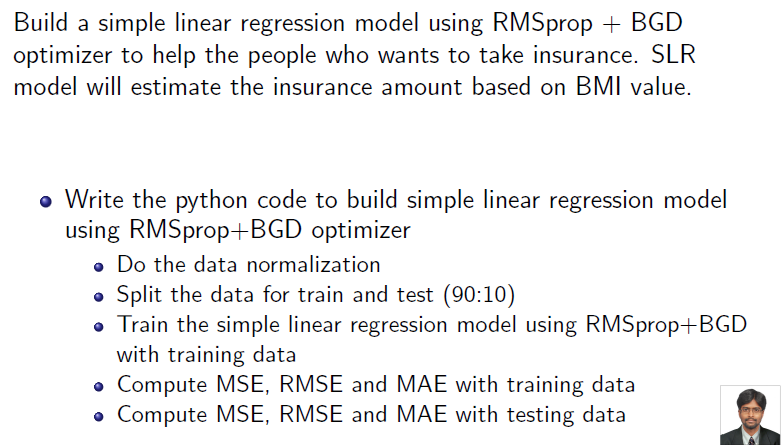

**Import Libraries**

In [1]:
import numpy as np
import math as mt
import random
import pandas as pd

**Load Data**

In [7]:
data = pd.read_csv('/content/RMSprop-Assignmnet-Dataset.csv')
data.head()

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520


**Min Max Values**

In [8]:
bmi_min=data['bmi'].min()
bmi_max=data['bmi'].max()
charges_min=data['charges'].min()
charges_max=data['charges'].max()

**Data Normalization**

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data_norm=scaler.transform(data)
data_norm

array([[0.3212268 , 0.25161076],
       [0.47914985, 0.00963595],
       [0.45843422, 0.05311516],
       ...,
       [0.56201238, 0.00810808],
       [0.26472962, 0.01414352],
       [0.35270379, 0.44724873]])

**2D array to Dataframe Conversion**

In [10]:
import pandas as pd
data_norm=pd.DataFrame(data_norm,columns=['BMI','Charges'])
data_norm.head()

,BMI,Charges
0,0.321227,0.251611
1,0.479150,0.009636
2,0.458434,0.053115
3,0.181464,0.333010
4,0.347592,0.043816


**Data Split**

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_norm.BMI, data_norm.Charges, test_size = 0.10, random_state = 10)

**Model parameters initialization**

In [12]:
m = random.uniform(-10,10) #Initial value of slope
c = random.uniform(-10,10) #Initial value of intercept
eta = 0.002 #Learning Rate
gama=0.9
edasg_m = 0
edasg_c = 0
max_iter = 10000 #Maximum number of iterations
eps=mt.pow(10,-8)

**Gradient Calculation**

In [13]:
def gradient(m_f, c_f, x, y):
  m_deriv = -1*(y-m_f*x-c_f)*x
  c_deriv = -1*(y-m_f*x-c_f)
  return m_deriv, c_deriv

**Model Training**

In [14]:
for iter in range(max_iter):
  del_m,del_c=0.0,0.0
  for sample in range(x_train.shape[0]):
    delm,delc=gradient(m,c,x_train.iloc[sample], y_train.iloc[sample])
    del_m=del_m+delm
    del_c=del_c+delc
  del_m=del_m/len(x_train)
  del_c=del_c/len(x_train)
  edasg_m=gama*edasg_m+(1-gama)*(del_m*del_m)
  edasg_c=gama*edasg_c+(1-gama)*(del_c*del_c)
  m=m-(eta*del_m)/(mt.sqrt(edasg_m+eps))
  c=c-(eta*del_c)/(mt.sqrt(edasg_c+eps))
  #print(f"Iteration: {iter}\tValue of m: {m}, \tValue of c: {c}")

print(f"\nThe local minima occurs at: {m}, {c}")


The local minima occurs at: 0.23998998323161388, 0.09606307626398912


**Training MSE**

In [15]:
q2=len(x_train)
error=0;
for j in range(q2):
    n2=m*x_train.iloc[j]+c
    error=error+(y_train.iloc[j]-n2)**2
error=error/q2
error

0.035877969687126296

**Testing MSE**

In [16]:
q1=len(x_test)
error=0;
for j in range(q1):
    n2=m*x_test.iloc[j]+c
    error=error+(y_test.iloc[j]-n2)**2
error=error/q2
error

0.003993121952137827

**Model Deployment**

In [17]:
X=input('enter load value')
print('X=',X)
X_norm=(float(X)-bmi_min)/(bmi_max-bmi_min)
print('X_norm=',X_norm)
Y_norm=m*float(X_norm)+c
Y=Y_norm*(charges_max-charges_min)+charges_min
print('Weight of nitrogen=',Y)

enter load value27
X= 27
X_norm= 0.2970137207425343
Weight of nitrogen= 11605.695581762877


## **Thank You**